In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd

In [ ]:
#GEOPANDAS là thư viện hàm để  vẽ bản đồ địa lý  trong jupyter
#pip3 install geopandas 
#Phải install thêm cả Fiona, Rtree,... đi kèm

In [14]:
schools = pd.read_csv('data/schools.csv')
#Đọc data vào schools để lấy các điểm lat(vĩ độ) và long(kinh độ)

In [15]:
schools.shape

(170, 16)

In [16]:
schools.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)"
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)"


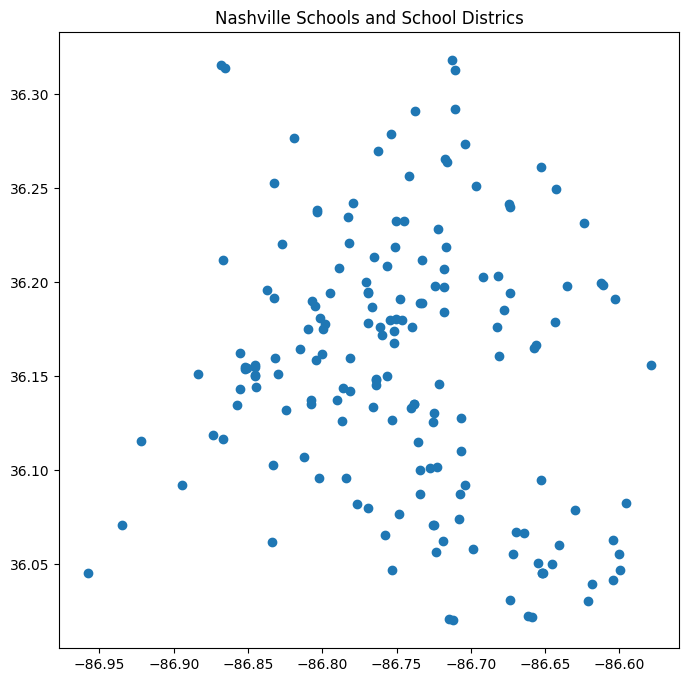

In [18]:
#Vẽ scatterplot thể hiện toạ độ lat và long của các trường trong Nashville
plt.figure(figsize=(8,8))
plt.scatter(schools.Longitude, schools.Latitude)
plt.title('Nashville Schools and School Districs')
plt.show()

In [19]:
#--------------------Đọc đối tượng geopandas-----------------------------------------------------#

In [20]:
service_district = gpd.read_file('data/school_districts.geojson.txt') #Tập tin này có chứa dữ liệu là các polygon để vẽ map

In [22]:
type(service_district) #GeoDataframe là loại dữ liệu để vẽ bản đồ địa lý

geopandas.geodataframe.GeoDataFrame

In [23]:
service_district.head() #Cột geometry chứa dữ liệu polygon, để vẽ bản đồ

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.7659 3..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


In [24]:
service_district.iloc[0] #Truy cập và xem dũ liệu của quan sát có index = 0

first_name                                           Dr. Sharon
city                                                  Nashville
zip                                                       37218
email                            gentryfordistrict1@comcast.net
state                                                        TN
last_name                                                Gentry
address                                         6108 Beals Lane
position                                                 Member
term_expir                                                 2016
district                                                      1
phone                                              615-268-5269
geometry      MULTIPOLYGON (((-86.77136400034288 36.38356699...
Name: 0, dtype: object

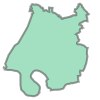

In [26]:
service_district.loc[0,'geometry'] #Hiện ra bản đồ của quan sát đầu tiên có hàng 0
#Dùng loc vì loc là label based

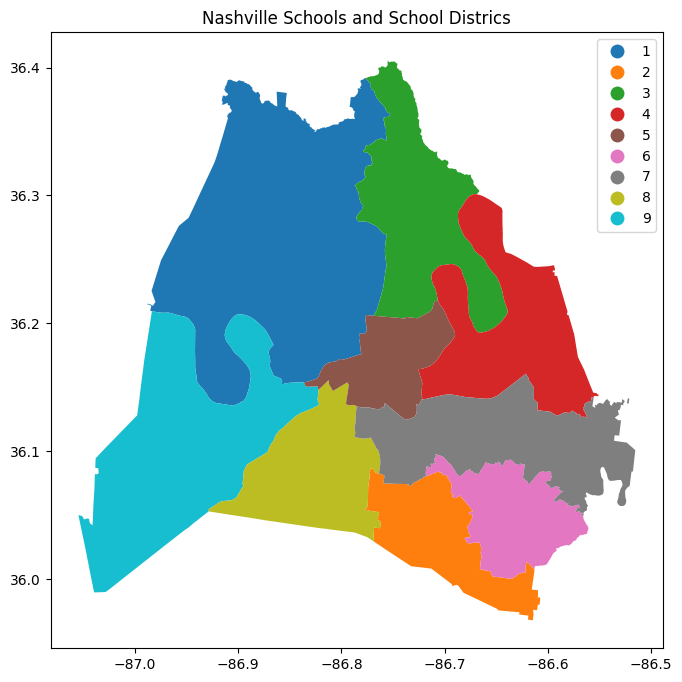

In [28]:
service_district.plot(column='district', figsize=(8,8), legend=True)
plt.title('Nashville Schools and School Districs')
plt.show()

#Vẽ bản đồ  tất cả các districts của Nashville

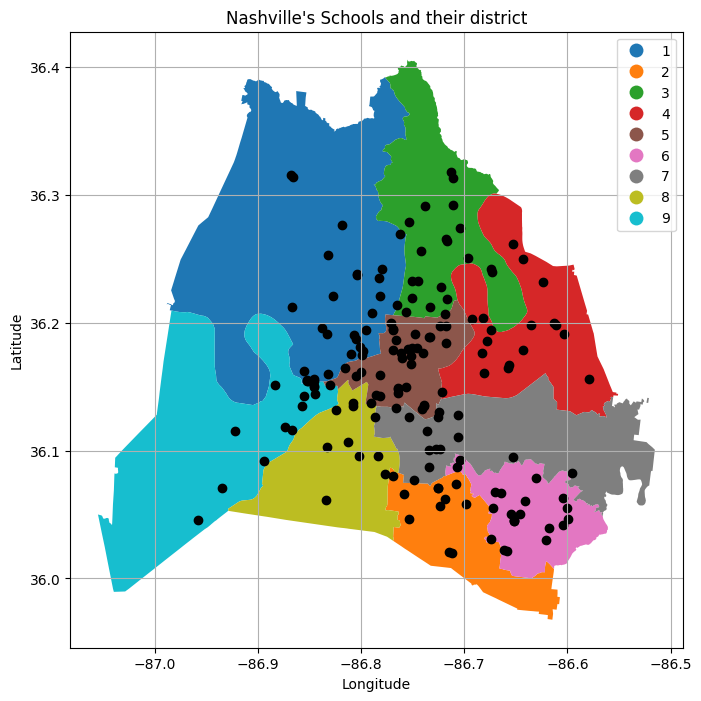

In [30]:
#----------Ghép bản dồ toạ độ các trường chồng lên bản đồ địa lý Nashville----------------#

service_district.plot(column='district', figsize=(8,8), legend=True) #Bản đồ địa lý Nashvile
plt.scatter(schools.Longitude, schools.Latitude, color='black') #Chám điểm toạ độ các trường Nashville

plt.title("Nashville's Schools and their district")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid() #Thêm lưới toạ độ

plt.show()